In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# imports

In [2]:

%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline


from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

# read Data

In [3]:
train = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')


In [4]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
train.shape

(768, 9)

# Check Missing Data

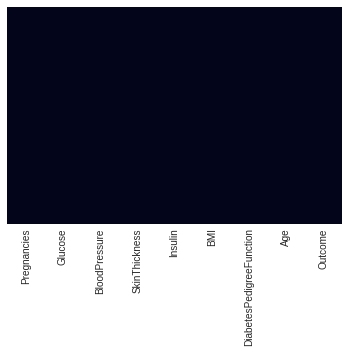

In [7]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False )

In [8]:
train.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

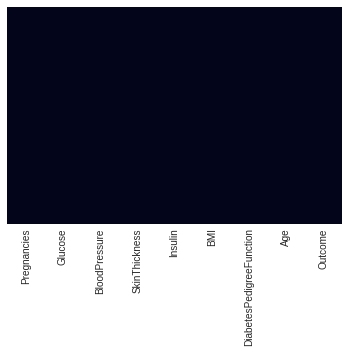

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False )

Ok there are no Nan Data but there are Zero Data So it is Like Nan Data So We Solved it 


In [10]:
# mark zero values as missing or NaN
train.iloc[:,1:6] = train.iloc[:,1:6].replace(0, np.NaN)


In [11]:
# Drop row if more than 2 values are missing.
train.dropna(thresh=2, axis=0, inplace=True)
train.shape

(768, 9)

In [12]:

imputer = SimpleImputer(missing_values = np.NAN, strategy = 'mean')
imputer = imputer.fit(train.iloc[:,1:6])
train.iloc[:,1:6] = imputer.transform(train.iloc[:,1:6])

In [13]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


# Analysis Data

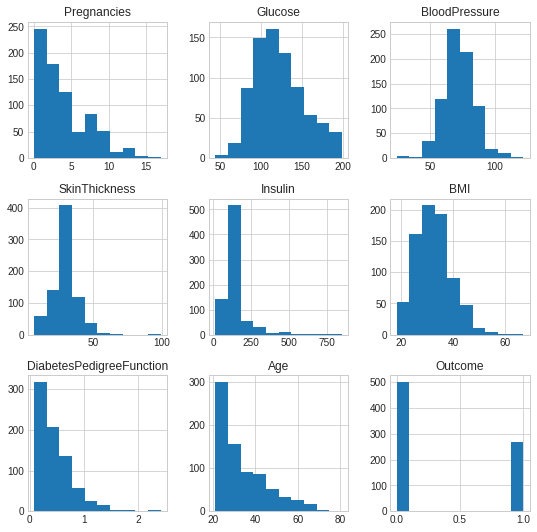

In [14]:
fig = train.hist(figsize=(9,9))


## Feature : Pregnancies    

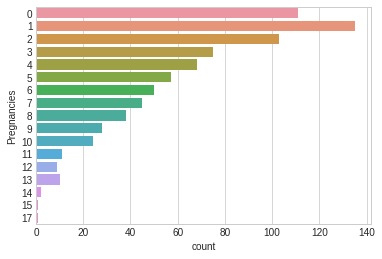

In [15]:
sns.countplot(y="Pregnancies", data=train);

# Feature :Outcome                   

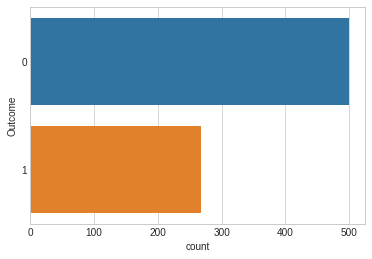

In [16]:
sns.countplot(y="Outcome", data=train ,);

Prepare and Split Data

In [17]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 5)


Scale Data

In [18]:

# Scaling features
standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

Build Model :Logistic Regression

In [19]:
LR =  LogisticRegression()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
Acc = accuracy_score(y_test, y_pred)

print( 'Accuracy Logistic Regression:',Acc)



Accuracy Logistic Regression: 0.7575757575757576


Use K-fold Cross Validation 

In [20]:

classifier_pipeline = make_pipeline(StandardScaler(), LR)
scores = cross_val_score(classifier_pipeline, X, y, cv=5)
scores_cv=scores.mean()
    
print('Accuracy Logistic Regression With K-fold :',scores_cv )

Accuracy Logistic Regression With K-fold : 0.7721585603938544
